# <ins>TASK 2: Understanding Customer Demographics</ins>
*Report writen by Arturo Sirvent Fresneda (cohort DS04, tutor Felice)*  
**26 JULY**

**................................................................................................................................................................................**
# <ins>Index</ins>

#### Introduction
#### Data dictionary
#### QUESTIONS to answer
#### Code


#### Final conclusions

**................................................................................................................................................................................**


# <ins>1-Introduction</ins>

After handing the first report about the EDA on the Demographic Data, Danielle Sherman,  
the Chief Technology Officer at Blackwell Electronics (our boss), has thanked us for the job,  
and has asked for the second part of the analysis, build a model and get a deeper understanding  
from the data. Specifically he has commented some ideas from  Martin Goodrich, the VP of Sales, and  
some questions that Daniel has (these and more are summed up in the **Questions and Objectives** part in this report).

Summarizing, we have to:
* Investigate more in depth some relations we saw in the EDA.
* Build ML algorithms for making predictions and getting a better understanding on the data.
    1. Test the models with different metrics.
    * Explore the hyperparameters space searching for the best performance.
    * Evaluate the models to be sure that the final choice is the best and most reliable model found so far. 
    

# <ins>2-Data Dictionary</ins>

We have explained this in task 1, however, since we are using the same data, lets review the data struture of out dataset.

The data from our dataset has 5 variables, one in each column.  
Some are numerical but other categories with a number assigned to it.

**In-store**  
    0: Online  
    1: In the store  

**Age**  
    Numerical value of the age of the person who made the purchase (integer).  
    
**Items**  
    Numerical value of the number of items purchased by a person. (integer)  
    
**Amount**  
    Numerical value of the price paid in a purchase. (float)  
    
**Region**  
    Categorical reference to the region in which the purchase was made.  
    
    1: North
    2: South 
    3: East 
    4: West 
    

# <ins>3-QUESTIONS to answer</ins>

Down are the questions that arise from the e-mail Daniel sent us. I will answer them as best as possible in this report.

#### From the e-mail: 
Directly extacted from the e-mail:  

* *... Martin Goodrich thinks that **customers who shop in the store are older than customers who shop online** and that **older people spend more money on electronics than younger people**...changes to the website to attract older buyers.*
  
  
* ... *gain insight into any **factors that can better understand the age of our customers** and if **it correlates with how much they spend**...*
  
  
* Infer any insights about customer purchasing behavior:
    * *Are there **differences in the age of customers between regions?** If so, can we predict the age of a customer in a region based on other demographic data?*
    * *We need to investigate Martin’s hypothesis: Is there any **correlation between age of a customer and if the transaction was made online or in the store**? Do any **other factors predict if a customer will buy online or in our stores?** *
      
      
* TO DO: *I’d like you to use machine learning to build a predictive model that can help us in our search.* And * create a brief report of your findings and conclusions and an explanation of how you arrived at those conclusions... *
    
#### From the POA  
Our work is to answer to Daniel's questions, and the POA from Task 2 gives us some more information about how to do it.
* Discretize Age and use it as the dependent variable; experiment with different numbers of bins.
* Discretize Amount and use it as the dependent variable. Can a useful model be constructed?
* Use two additional classification algorithms from Sci-Kit Learn: 
    * RandomForestClassifier
    * GradientBoostingClassifier
Other questions:
* What about items? Are these even in the tree? Why or why not?
* What about classifying Where a transaction took place -can that be done successfully?
* Tune the parameters of the models (maxdepth etc...).
(It is mentioned that ideally you should be able to achieve an accuracy of higher than 75%)  
 

# Things to add

* Grid search, explicarlo y el cross-validation
* Dummy variables
* search for different discretizations in: amount and age <br> buscar decission tree descritaizers y k means discretization..
* Regresiones y tal, no estaría de más meter una
* Plotear y explicar feature\_importance_ atribute

## Things to mention/check while writting the report

* Mencionar lo de la varianza, el bias, el cálculo de errores y la robustez del modelo. Importancia de la VALIDACIÓN del modelo.
* Uso de stratify si los datos no son homogeneos, mismo numero de cada clas. Esto se usa para que una <br> característica este presente en el mismo porcentaje en todas las particiones. 
* Hablar de accuracy, precission,recall, f1, AUC ROC!! etc...
* Dejar muy claro al hablar de regresiones etc, que hablamos de la muestra y no conocemos la POBLACIÓN
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br> resulta que el  DT es invariante al reescalado ese, gracias a que se procesa una a una y no de forma conjunta, poner ejemplos donde esto si es util.

# <ins>4- CODE</ins>


In [27]:
#import all the required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree

### Recap about the EDA relative to the ages 
In the EDA from Task 1, we talked about the ages relative to the regions, and to the channel of the purchase (online or in-store).

Before building any model, lets try to gain perspective about the claims that Martin Goodrich did:

1. **Customers who shop in the store are older than customers who shop online.**
2. **Older people spend more money on electronics than younger people.**


Also we would like, before starting the feature selection, to have an idea about:
1. **Factors that can better understand the age of our customers.**
2. **and if it correlates with how much they spend.**

*(I don't forget about the other questions like: Correlation between age of a customer and if the transaction was made online or in-store. But lets go a step at a time)*


In [137]:
#Load data
data = pd.read_csv("Demographic_Data.csv")

In [138]:
#perform the data cleaning

#CAUTION!!!!
#Data cleaning it's a whole process itself, with many steps and reasoning,
#here we do it that simple, because we have studied that PARTICULAR case in task 1. 
#Therefore we know that the only required operation for now, will be dealing with some 
#duplicated columns (21 in total).
data = data.drop_duplicates()

#this line below is for reseting the row numeration, from 0 to ...end
#because when dorping some duplicates the index numbers where no consecutive. Example: 1,2,4,5,7...end
data=data.reset_index(drop=True)
colname=data.columns
data

in-store  age  items   amount  region
0             0   37      4   281.03       2
1             0   35      2   219.51       2
2             1   45      3  1525.70       4
3             1   46      3   715.25       3
4             1   33      4  1937.50       1
...         ...  ...    ...      ...     ...
79974         1   71      3   558.82       1
79975         0   59      7  1932.00       3
79976         0   54      1   414.16       2
79977         1   49      4   335.32       1
79978         1   30      1   527.12       3

[79979 rows x 5 columns]

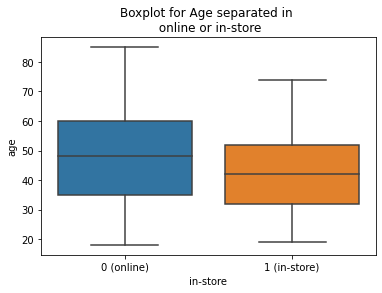

In [121]:
#Customers who shop in-store are older than customers who shop online
#for anwering this, we will use boxplots

plt.figure()
sns.boxplot(x=colname[0],y=colname[1], data=data)

plt.xticks([0,1],["0 (online)","1 (in-store)"])
plt.title("Boxplot for Age separated in \n online or in-store");

This is for the four regions together, lets plot for each region, to see it it changes from region to region.

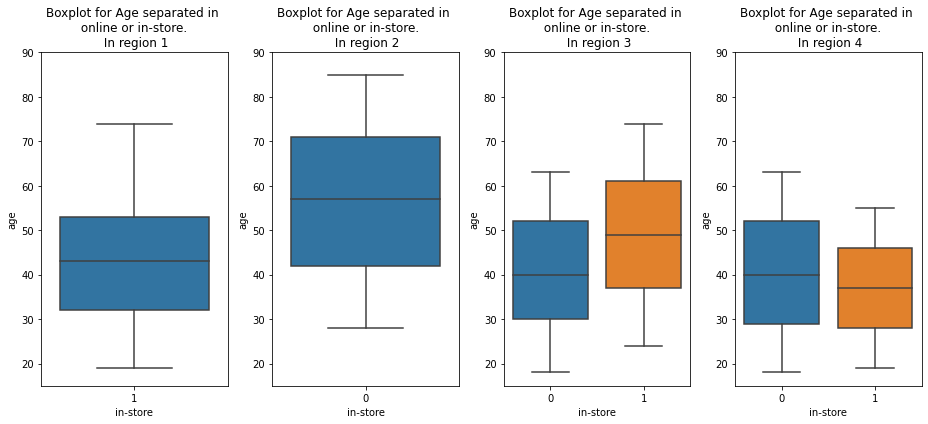

In [122]:
plt.figure(figsize=(13,6))
for i in [1,2,3,4]:
    plt.subplot(1,4,i)
    sns.boxplot(x="in-store",y="age",data=data.loc[data["region"]==i,["age","in-store"]])
    plt.ylim([15,90])
    plt.title(f"Boxplot for Age separated in \n online or in-store. \n In region {i}");
plt.tight_layout()

From the last boxplots, and recalling that we are working with a sample of data, and that could not extrapolate correctly to the population, we see how only in region 3 the purchases in-store are made by older people than online. In the four regions together the average age is greater for the purchases online and not the ones in-store.  
**However**, that doesn't mean that that older people spend more money than younger ones, but in less purchases.

Because boxplot only tells us about sample-distribution, we need a comparison between the real amount of counts in each region, separated in each case of online and in-store.
This is what I show in the next pie chart.

In [123]:
from matplotlib.lines import Line2D

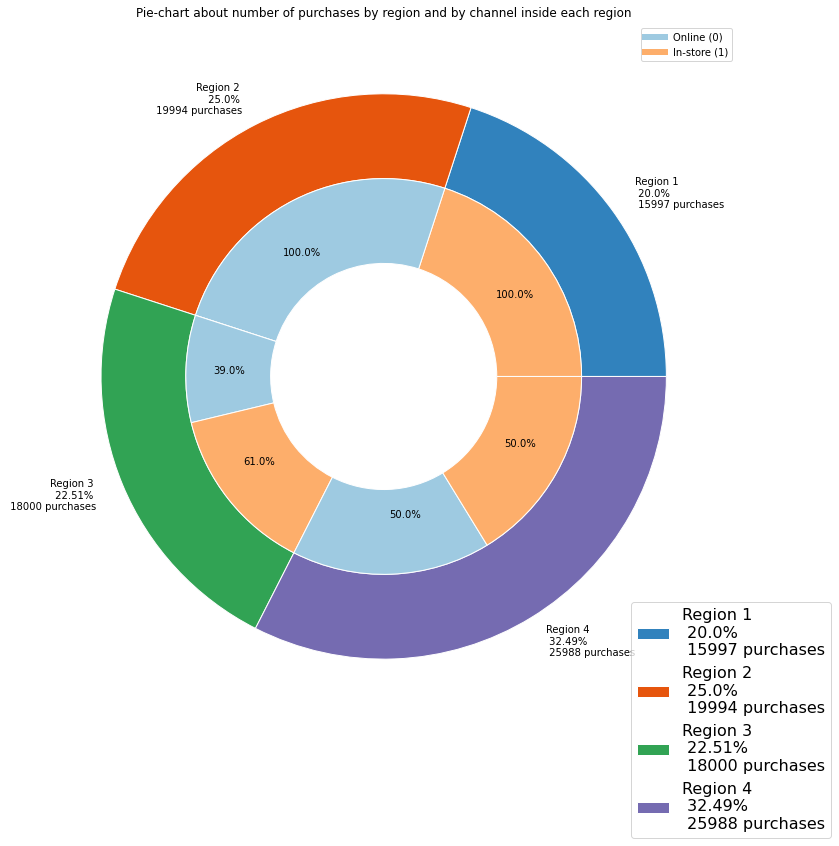

In [124]:
#we aim to create a 2 level pie chart

fig, ax = plt.subplots(figsize=(13,13))

size = 0.3
#here I get the number of purchases in each region, online and in-store
vals = np.array([data.loc[data["region"]==1,"in-store"].value_counts().reindex(data["in-store"].unique(),
                                                                               fill_value=0).values,
                data.loc[data["region"]==2,"in-store"].value_counts().reindex(data["in-store"].unique(), 
                                                                               fill_value=0).values,
                data.loc[data["region"]==3,"in-store"].value_counts().reindex(data["in-store"].unique(), 
                                                                              fill_value=0).values,
                data.loc[data["region"]==4,"in-store"].value_counts().reindex(data["in-store"].unique(),
                                                                              fill_value=0).values])
#for the percentages in the iner circle
sum_aux=np.sum(vals,axis=1)
prob_aux=np.array([[round(vals[i][0]/sum_aux[i],2),round(vals[i][1]/sum_aux[i],2)] for i in range(4)] )
prob_aux=prob_aux.flatten()
prob_aux=["" if(i==0) else str(i*100)+"%"  for i in prob_aux]

#percentages in the outer circle
total_aux=vals.sum(axis=None)
sum_aux_2=vals.sum(axis=-1)
prob_aux_out=[round(100*i/total_aux,2) for i in sum_aux_2]

#indices for the labels
index_labels=np.array([data.loc[data["region"]==1,"in-store"].value_counts().reindex(data["in-store"].unique(),
                                                                                     fill_value=0).index.values, 
                       data.loc[data["region"]==2,"in-store"].value_counts().reindex(data["in-store"].unique(),
                                                                                     fill_value=0).index.values,
                       data.loc[data["region"]==3,"in-store"].value_counts().reindex(data["in-store"].unique(),
                                                                                     fill_value=0).index.values,
                       data.loc[data["region"]==4,"in-store"].value_counts().reindex(data["in-store"].unique(),
                                                                                     fill_value=0).index.values])
#create de labels in string mode
index_labels_text=index_labels.astype("object")
index_labels_text[index_labels==0]="online"
index_labels_text[index_labels==1]="in-store"

#colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(index_labels.flatten()*4+2)

#build first graph outter
ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,wedgeprops=dict(width=size, edgecolor='w'),
       labels=[f"Region 1 \n {prob_aux_out[0]}% \n {sum_aux_2[0]} purchases",
              f"Region 2 \n {prob_aux_out[1]}% \n {sum_aux_2[1]} purchases",
              f"Region 3 \n {prob_aux_out[2]}% \n {sum_aux_2[2]} purchases",
              f"Region 4 \n {prob_aux_out[3]}% \n {sum_aux_2[3]} purchases"])
fig.legend(fontsize=16,loc=4)
#build second graph inner
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=prob_aux,labeldistance=0.7)
ax.legend([Line2D([0], [0], color=cmap(2), lw=6),
           Line2D([0], [0], color=cmap(4+2), lw=6)],["Online (0)","In-store (1)"])
ax.set(aspect="equal", title='Pie-chart about number of purchases by region and by channel inside each region');
plt.show()

**The last pie chart only counts for number of purchases, but no the amount of money the people spent.**  
This distinction is important because maybe the older people dont buy as many times as the young one, IN NUMBER OF PURCHASES!!, BUT MAYBE OLD PEOPLE SPEND MORE MONEY IN LESS PURCHASES. In that case the old people should be out main target since it is money what makes gains, and not number of purchases.

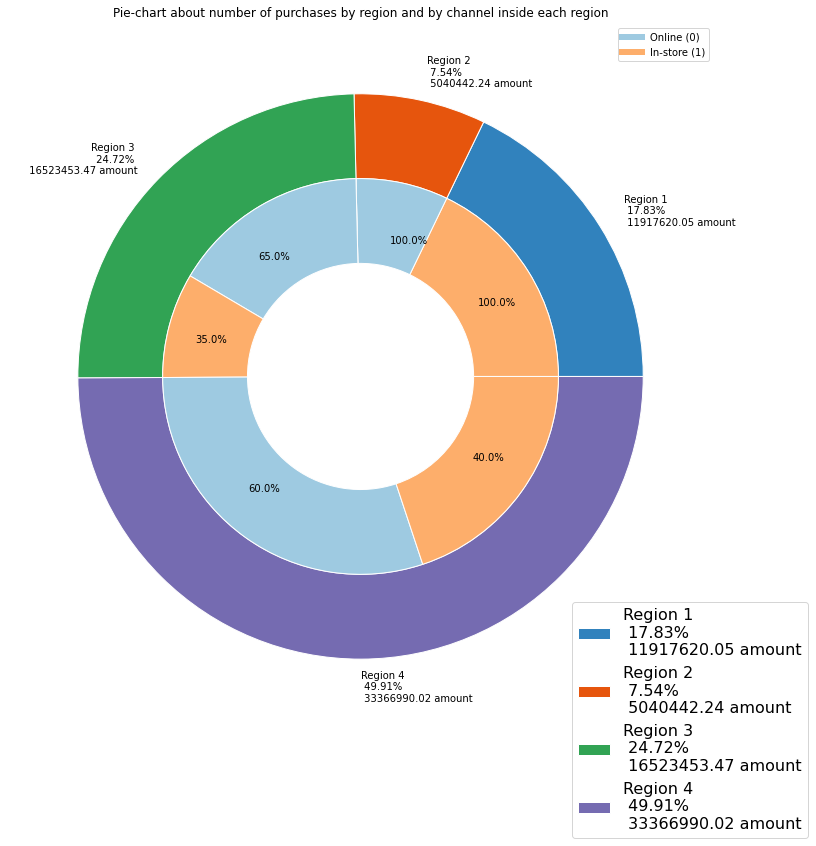

In [125]:
#we aim to create a 2 level pie chart
fig, ax = plt.subplots(figsize=(13,13))

size = 0.3
#first we get the values for the amount in each region, also separated in online and is-store
vals = np.array([data.loc[data["region"]==1,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                     fill_value=0).values.squeeze(),
                data.loc[data["region"]==2,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                    fill_value=0).values.squeeze(),
                data.loc[data["region"]==3,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                    fill_value=0).values.squeeze(),
                data.loc[data["region"]==4,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                    fill_value=0).values.squeeze()])
#for the percentages in the iner circle
sum_aux=np.sum(vals,axis=1)
prob_aux=np.array([[round(vals[i][0]/sum_aux[i],2),round(vals[i][1]/sum_aux[i],2)] for i in range(4)] )
prob_aux=prob_aux.flatten()
prob_aux=["" if(i==0) else str(i*100)+"%"  for i in prob_aux]

#percentages in the outer circle
total_aux=vals.sum(axis=None)
sum_aux_2=[round(i,2) for i in vals.sum(axis=-1)]
prob_aux_out=[round(100*i/total_aux,2) for i in sum_aux_2]

#indices for the labels
index_labels=np.array([data.loc[data["region"]==1,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                     fill_value=0).index.values,
                data.loc[data["region"]==2,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                    fill_value=0).index.values,
                data.loc[data["region"]==3,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                    fill_value=0).index.values,
                data.loc[data["region"]==4,["amount","in-store"]].groupby("in-store").sum().reindex(data["in-store"].unique(),
                                                                                                    fill_value=0).index.values])
#write the labels
index_labels_text=index_labels.astype("object")
index_labels_text[index_labels==0]="online"
index_labels_text[index_labels==1]="in-store"

#colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(index_labels.flatten()*4+2)

#build the outer section
ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,wedgeprops=dict(width=size, edgecolor='w'),
       labels=[f"Region 1 \n {prob_aux_out[0]}% \n {sum_aux_2[0]} amount",
              f"Region 2 \n {prob_aux_out[1]}% \n {sum_aux_2[1]} amount",
              f"Region 3 \n {prob_aux_out[2]}% \n {sum_aux_2[2]} amount",
              f"Region 4 \n {prob_aux_out[3]}% \n {sum_aux_2[3]} amount"])
fig.legend(fontsize=16,loc=4)
#build the inner chart
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=prob_aux,labeldistance=0.7)
ax.legend([Line2D([0], [0], color=cmap(2), lw=6),
           Line2D([0], [0], color=cmap(4+2), lw=6)],["Online (0)","In-store (1)"])
ax.set(aspect="equal", title='Pie-chart about number of purchases by region and by channel inside each region');
plt.show()

From last plot we can se how important is each region in terms of total income either online or in-store.  
A lot of effort must be put in region 4 since it means almost the 50 percent of the total income,  
and region 3 is as important, in terms of amount/money, as regions 2 and 1 together.

From here we can't see if older people is more important than young one in terms of amount.  
For this purpose, I will attempt two things:
1. see if there is some correlation between age and amount (both online and in-store separately and together).
2. discretizate the ages, to work with intervals instead of the whole spectrum of values.

### 1- To investigate some kind of correlation, the 2D-histograms are very useful since in this case a scatter plot gets very messy (and theres no clear structure). 

In [126]:
plt.figure(figsize=(13,13));
#2D histogram with 1D histogram in the sides, made with plotly
px.density_heatmap(data, x="age", y="amount", marginal_x="histogram", marginal_y="histogram",
                   title="2D histogram for the relation between age and amount in the 4 regions together.")

<Figure size 936x936 with 0 Axes>

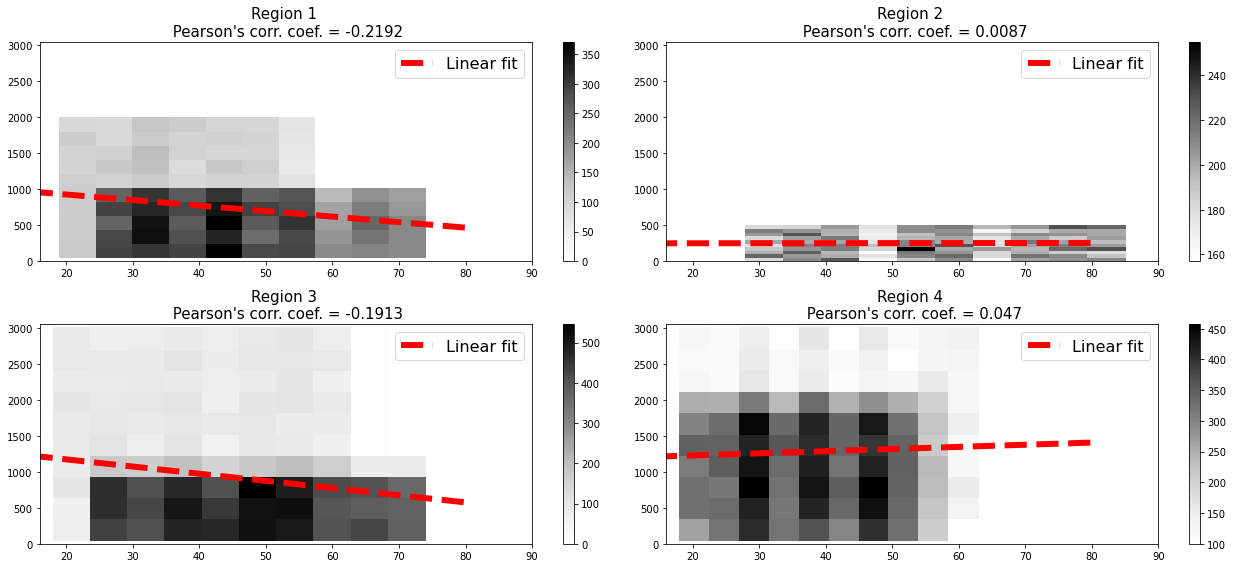

In [127]:
#2D histograms separated by regions, made with matplotlib
#also I add here the linear regresion made with the values data.loc[data["region"==i],"age"] 
#and data.loc[data["region"==i],"age"])
#and the Pearson correlation coeff. I didn't add the Spearman correlation coefficient because I saw no evidences
#that it could be needed.
fig=plt.figure(figsize=(18,8))
for i in [1,2,3,4]:
    data_aux=data.loc[data["region"]==i]
    fit_params=np.polyfit(data_aux["age"],data_aux["amount"],1)
    cor_coef=np.corrcoef(data_aux["age"],data_aux["amount"])
    plt.subplot(2,2,i)
    plt.hist2d(x="age",y="amount",data=data_aux,cmap="Greys")
    plt.xlim([16,90])
    plt.ylim([0,3050])
    plt.title(f"Region {i} \n Pearson's corr. coef. = {round(cor_coef[0,1],4)}",fontsize=15)
    plt.plot([0,80],[fit_params[1],fit_params[0]*80+fit_params[1]],"r--",linewidth=6,label="Linear fit")
    plt.legend(fontsize=16)
    plt.colorbar()
plt.tight_layout()


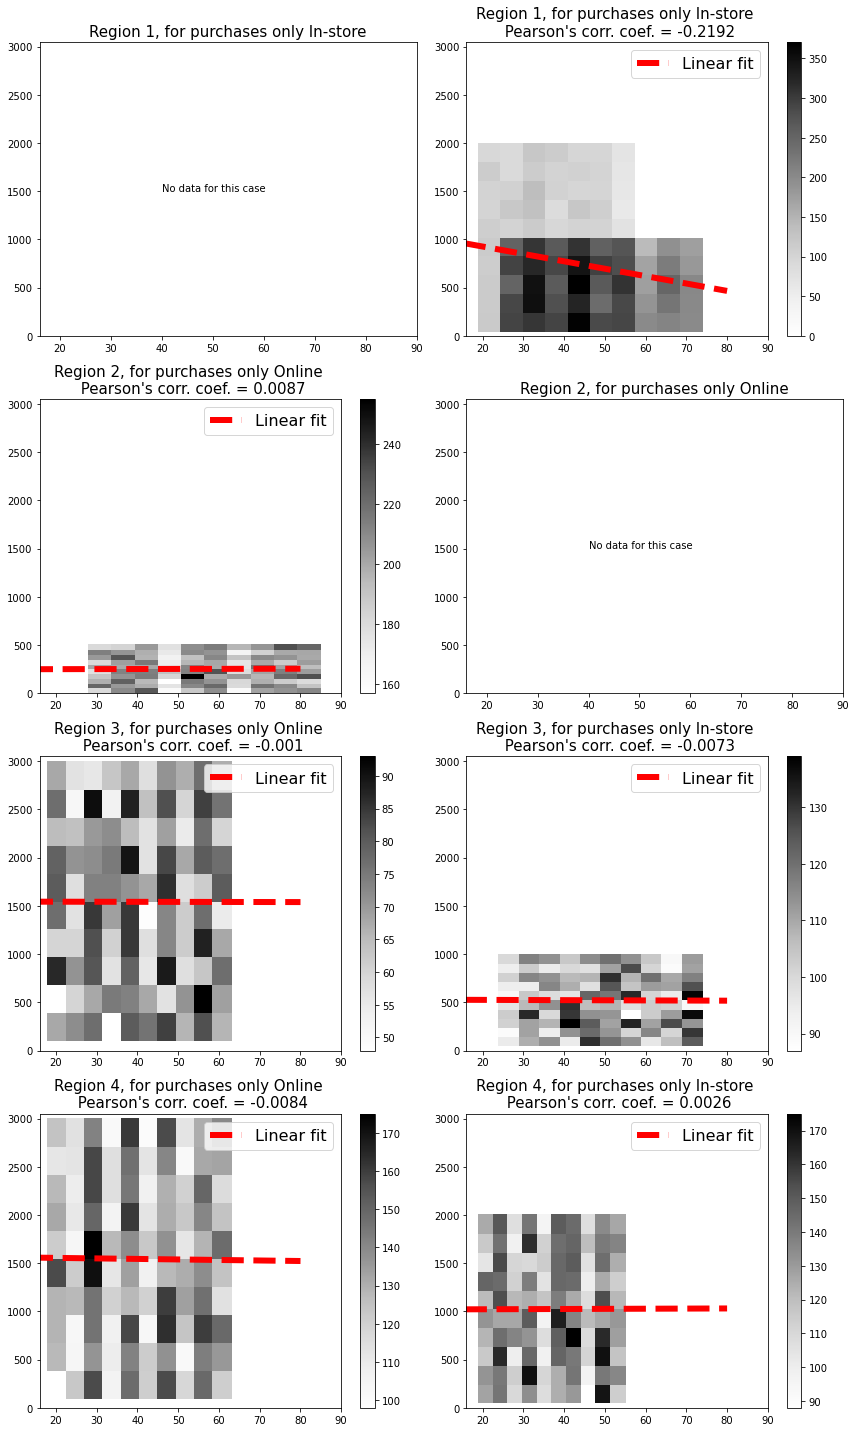

In [128]:
#to see if maybe things are different separating into channel -> online and in-store 
#lets do the same but doing such differentiation

#2D histograms separated by regions, made with matplotlib
#also I add here the linear regresion made with the values data.loc[data["region"==i],"age"] 
#and data.loc[data["region"==i],"age"])
#and the Pearson correlation coeff. I didn't add the Spearman correlation coefficient because I saw no evidences
#that it could be needed.
fig=plt.figure(figsize=(12,20))
for i in [1,2,3,4]:
    for j in [0,1]:
        data_aux=data.loc[(data["region"]==i)&(data["in-store"]==j)]
        if not data_aux.empty:
            fit_params=np.polyfit(data_aux["age"],data_aux["amount"],1)
            cor_coef=np.corrcoef(data_aux["age"],data_aux["amount"])
            plt.subplot(4,2,i*2-1+j)
            plt.hist2d(x="age",y="amount",data=data_aux,cmap="Greys")
            plt.xlim([16,90])
            plt.ylim([0,3050])
            if j==0:
                text="Online"
            else:
                text="In-store"
            plt.title(f"Region {i}, for purchases only {text} \n Pearson's corr. coef. = {round(cor_coef[0,1],4)}",
                      fontsize=15)
            plt.plot([0,80],[fit_params[1],fit_params[0]*80+fit_params[1]],"r--",linewidth=6,label="Linear fit")
            plt.legend(fontsize=16)
            plt.colorbar()
        else:
            plt.subplot(4,2,i*2-1+j)
            plt.title(f"Region {i}, for purchases only {text}",
                      fontsize=15)
            plt.xlim([16,90])
            plt.ylim([0,3050])
            plt.text(40,1500,"No data for this case")
plt.tight_layout()



Although we already performed an EDA in the task 1, these new results are useful for aswering the questions made by Daniel in the e-mail from task 2.  
Therefore and sticking to what the sample data shows us, we can say that:   
**Our data shows no evidence for the claims made by Martin Goodrich about age and amount spent**.  



### 2. Discretizate the ages, to work with intervals instead of the whole spectrum of values.

I will try two different strategies for this.  
    1. Separation in three intervals with no prior justification.
        * Range 1: Young 18-30
        * Range 2: Adult 31-60
        * Range 3: Old 61-100
    2. Discretize the ages with some clustering algorithm like k-means discretization...

In [143]:
#discretize in intervals 18-30, 30-60, 60-100

data.loc[(data["age"]>=18)&(data["age"]<=30),"age_range"]=1
data.loc[(data["age"]>30)&(data["age"]<=60),"age_range"]=2
data.loc[(data["age"]>60)&(data["age"]<=100),"age_range"]=3

#check if there is any NaN in the "age_range" column
if data["age_range"].isnull().values.any():
    print("Error, some ages were not assigned an interval")
    print(data.loc[data["age_range"].isnull()])
else:
    print("All good, all ages were assigned an interval")
    colname=data.columns.values

All good, all ages were assigned an interval


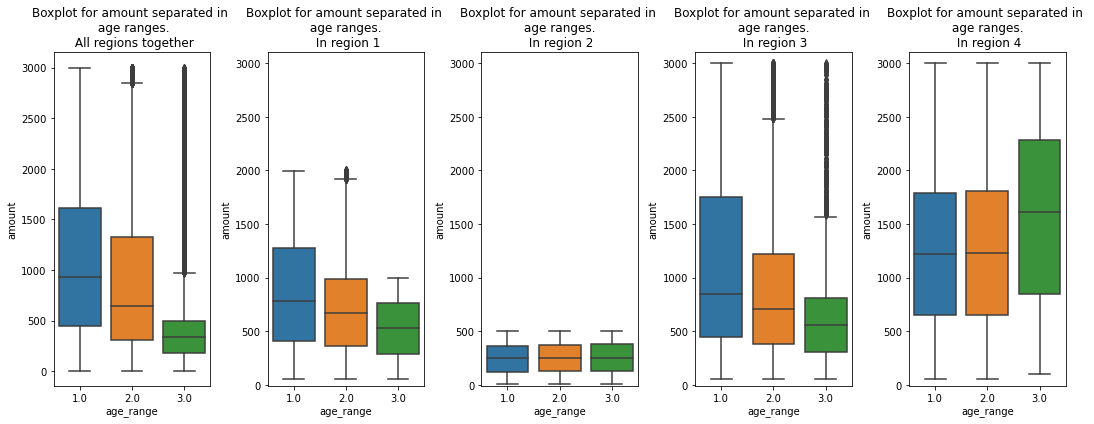

In [156]:
plt.figure(figsize=(15,6))
plt.subplot(1,5,1)
sns.boxplot(x="age_range",y="amount", data=data)
plt.title("Boxplot for amount separated in \n age ranges.\n All regions together");
for i in [2,3,4,5]:
    plt.subplot(1,5,i)
    sns.boxplot(x="age_range",y="amount",data=data.loc[data["region"]==i-1,["age_range","amount"]])
    plt.ylim([-10,3100])
    plt.title(f"Boxplot for amount separated in \n age ranges. \n In region {i-1}");
plt.tight_layout()

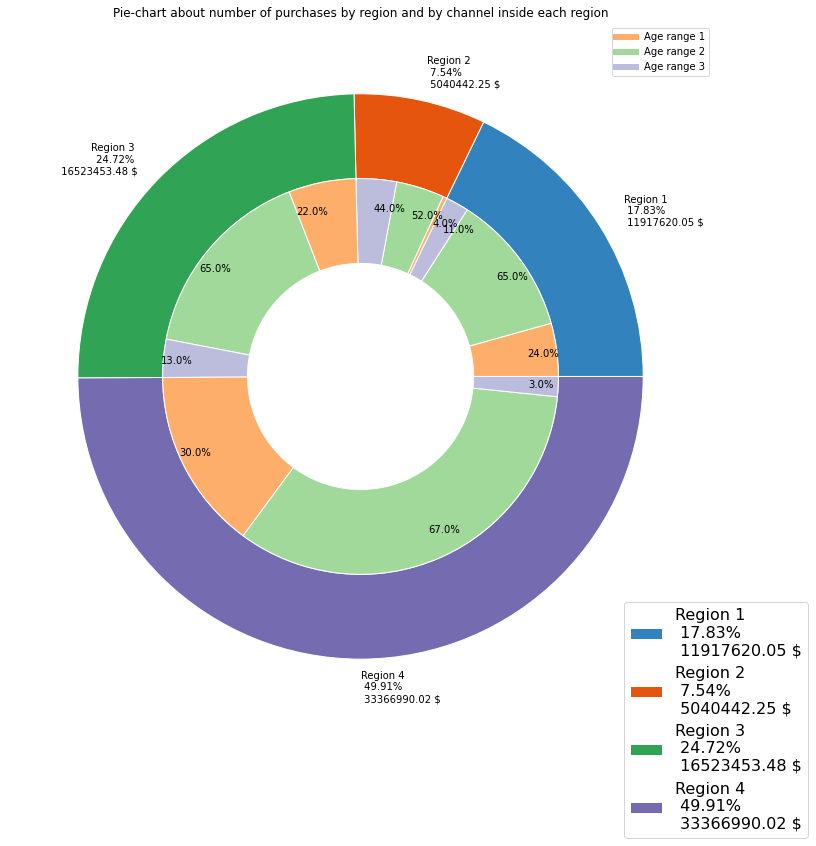

In [204]:
#lets plot the double pie chart to get insight about the percentages
fig, ax = plt.subplots(figsize=(13,13))

size = 0.3
#here I get the number of purchases in each region, online and in-store


vals = np.array([data.loc[data["region"]==1,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze(),
                data.loc[data["region"]==2,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze(),
                data.loc[data["region"]==3,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze(),
                data.loc[data["region"]==4,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze()])
#for the percentages in the iner circle
sum_aux=np.sum(vals,axis=1)
prob_aux=np.array([[round(vals[i][0]/sum_aux[i],2),round(vals[i][1]/sum_aux[i],2),round(vals[i][2]/sum_aux[i],2)] for i in range(4)] )
prob_aux=prob_aux.flatten()
prob_aux=["" if(i==0) else str(i*100)+"%"  for i in prob_aux]

#percentages in the outer circle
total_aux=vals.sum(axis=None)
sum_aux_2=vals.sum(axis=-1).round(2)
prob_aux_out=[round(100*i/total_aux,2) for i in sum_aux_2]

#indices for the labels
index_labels=np.array([1,2,3,1,2,3,1,2,3,1,2,3])

#colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(index_labels.flatten()*4+2)

#build first graph outter
ax.pie(sum_aux, radius=1, colors=outer_colors,wedgeprops=dict(width=size, edgecolor='w'),
       labels=[f"Region 1 \n {prob_aux_out[0]}% \n {sum_aux_2[0]} $",
              f"Region 2 \n {prob_aux_out[1]}% \n {sum_aux_2[1]} $",
              f"Region 3 \n {prob_aux_out[2]}% \n {sum_aux_2[2]} $",
              f"Region 4 \n {prob_aux_out[3]}% \n {sum_aux_2[3]} $"])
fig.legend(fontsize=16,loc=4)
#build second graph inner
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=prob_aux,labeldistance=0.85)
ax.legend([Line2D([0], [0], color=cmap(6), lw=6),Line2D([0], [0], color=cmap(10), lw=6),
          Line2D([0], [0], color=cmap(14), lw=6)],["Age range 1","Age range 2","Age range 3"])
ax.set(aspect="equal", title='Pie-chart about number of purchases by region and by channel inside each region');
plt.show()

In [193]:
vals = np.array([data.loc[data["region"]==1,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze(),
                data.loc[data["region"]==2,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze(),
                data.loc[data["region"]==3,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze(),
                data.loc[data["region"]==4,["age_range","amount"]].groupby("age_range").sum().round(2).sort_index().values.squeeze()])
